<a href="https://colab.research.google.com/github/ChloeLaForge/Quizzes-2---Chloe-LaForge/blob/main/In_Class_Assignment_5_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming - In-Class Assignment


Import necessary libraries and load the data

From kaggle (https://www.kaggle.com/datasets/yasserh/titanic-dataset):
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren't enough lifeboats for everyone on board, resulting in the death ofmore than half of the passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

This exercise seeks to explore the factors that appeared to influence survival.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the 'titanic' dataset from seaborn
titanic_data = sns.load_dataset('titanic')

display(titanic_data.head())
print(titanic_data.shape)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


(891, 15)


Task 1: Calculate overall survival rate.

Hint: becausse 'survived' is 0 and 1, survival rate can be computed as the .mean() of that column

In [ ]:
# Calculate overall survival rate
overall_survival_rate = titanic_data['survived'].mean()
print(f"Overall survival rate: {overall_survival_rate:.2f}")

Overall survival rate: 0.38


Task 2: Calculate and print the survival rates by gender/sex ('sex'), passenger class ('class'), and embarkation point ('embarked'; the location where the journey began).

Hint: the material showed us how to filter material, which can work here. Pandas dataframes also offers a convenient function groupby, that will take a one or a list of columns, and group the data by the values of that/those column(s). Operations (such as .mean()) on the returned item will be performed on each group.

Survival rates by gender:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


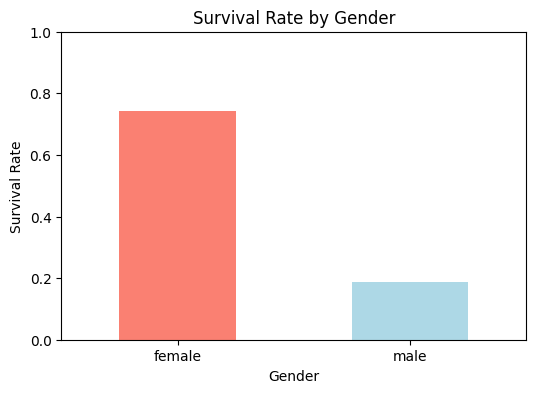

In [ ]:
# Calculate survival rates by gender and visualize it
survival_rate_by_gender = titanic_data.groupby('sex')['survived'].mean()
print("Survival rates by gender:")
print(survival_rate_by_gender)

plt.figure(figsize=(6, 4))
survival_rate_by_gender.plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()


Survival rates by passenger class:
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


/tmp/ipython-input-1790521293.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_class = titanic_data.groupby('class')['survived'].mean()


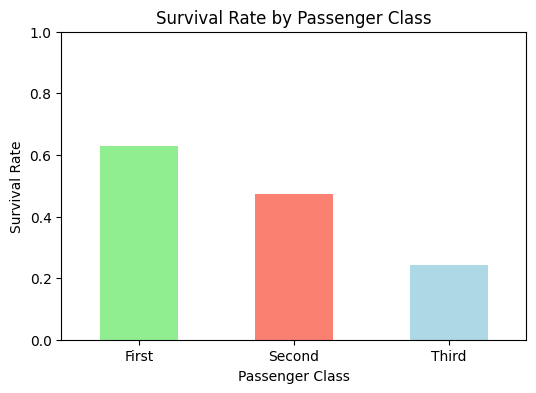

In [ ]:
# Calculate survival rates by passenger class and visualize it
survival_rate_by_class = titanic_data.groupby('class')['survived'].mean()
print("\nSurvival rates by passenger class:")
print(survival_rate_by_class)

plt.figure(figsize=(6, 4))
survival_rate_by_class.plot(kind='bar', color=['lightgreen', 'salmon', 'lightblue'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()


Survival rates by embarkation point:
embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


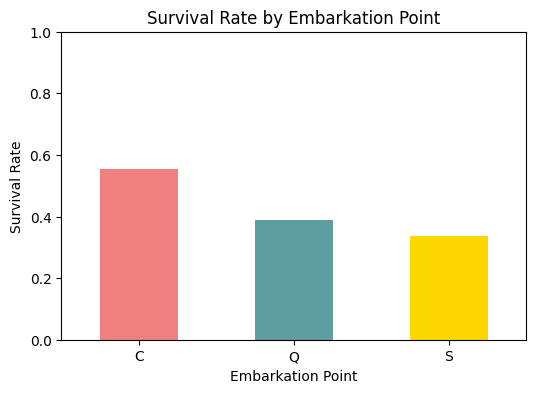

In [ ]:
# Calculate survival rates by embarkation point and visualize it
survival_rate_by_embarked = titanic_data.groupby('embarked')['survived'].mean()
print("\nSurvival rates by embarkation point:")
print(survival_rate_by_embarked)

plt.figure(figsize=(6, 4))
survival_rate_by_embarked.plot(kind='bar', color=['lightcoral', 'cadetblue', 'gold'])
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

Task 3: Calculate the survival rate by age group (under 12 as child, 13-20 as teen, 21-40 as adult, 41-60 as middle-aged, above 61 as senior).

In [ ]:
# create a new column age_group based on the criteria above
bins = [0, 12, 20, 40, 60, np.inf]
labels = ['child', 'teen', 'adult', 'middle-aged', 'senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels, right=True)

# Calculate survival rates by age group
survival_rate_by_age_group = titanic_data.groupby('age_group')['survived'].mean()
print("\nSurvival rates by age group:")
print(survival_rate_by_age_group)


Survival rates by age group:
age_group
child          0.579710
teen           0.381818
adult          0.397403
middle-aged    0.390625
senior         0.227273
Name: survived, dtype: float64


/tmp/ipython-input-1647100717.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = titanic_data.groupby('age_group')['survived'].mean()


Task 4: Create a box plot for age distribution by survival.

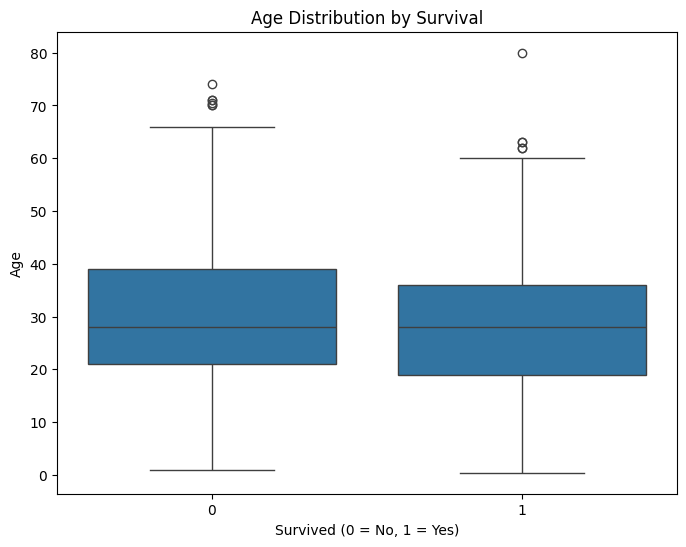

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for age distribution by survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=titanic_data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

Task 5: Create a stacked bar chart to visualize the distribution of Titanic passengers by class, using different colors to represent survival status within each class.
Hint: try creating a comment to do this one and use the AI to help. What is this code doing?

/tmp/ipython-input-2829774298.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_survival = titanic_data.groupby(['class', 'survived']).size().unstack()


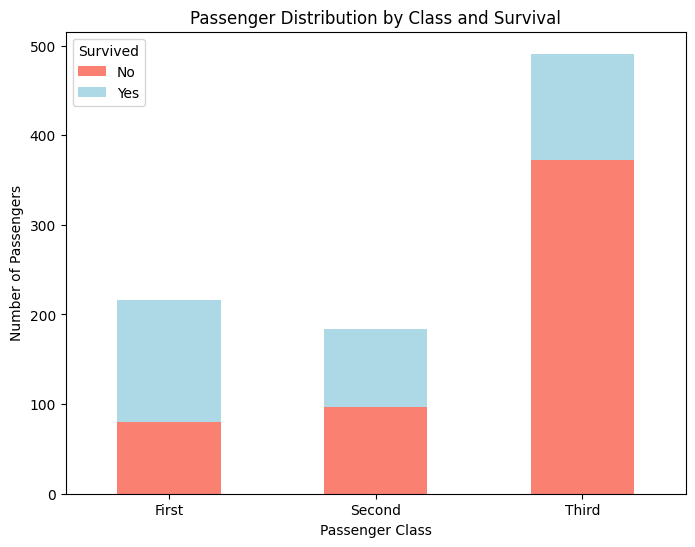

In [ ]:
import matplotlib.pyplot as plt

# Create a stacked bar chart to visualize the distribution of Titanic passengers by class
class_survival = titanic_data.groupby(['class', 'survived']).size().unstack()
class_survival.plot(kind='bar', stacked=True, figsize=(8, 6), color=['salmon', 'lightblue'])
plt.title('Passenger Distribution by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Open-Ended Questions:** From our analysis, some more in-depth questions can be raised. Please discuss and attempt to answer them by using Python to perform data analysis and visualizations to support your claims. Keep in mind that there are no definitive answers to these questions.

Question 1: Given, from task 2, the survival rates by embarkation point are as follows:

| Embarkation Point | Survival Rate (%) |
|-------------------|--------------------|
| C                 | 55.36              |
| Q                 | 38.96              |
| S                 | 33.70              |

does this indicate that, if you will be on the Titanic, better to select Port C as your embarkation point for increasing the chances of survival?

**Your Q1 discussion here:**
**While Port C has the highest survival rate of 55.53%, this does not mean that the embarkation point caused these higher survival rates. For example, Port C has a much higher percentage of First-Class passengers, and these passengers had a higher survival rate. Also, Port C has a higher percentage of female passengers, who also had a much higher survival rate. Thus, the embarkation point is correlated with these factors, which had a higher point of survival, but the Port itself didn't necessarily influence survival.


Passenger distribution by Embarkation Point and Class:
class     First  Second  Third
embarked                      
C            85      17     66
Q             2       3     72
S           127     164    353


/tmp/ipython-input-2709542563.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_by_embarked = titanic_data.groupby(['embarked', 'class']).size().unstack()


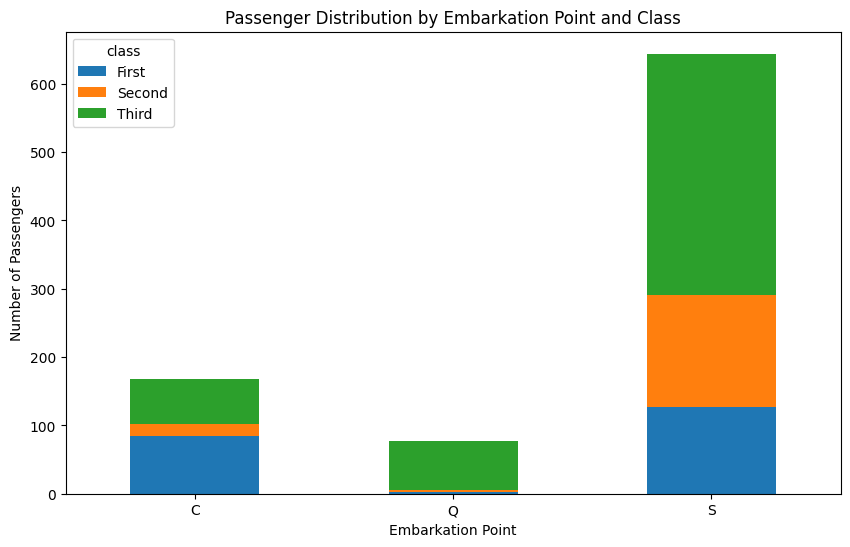


Passenger distribution by Embarkation Point and Gender:
sex       female  male
embarked              
C             73    95
Q             36    41
S            203   441


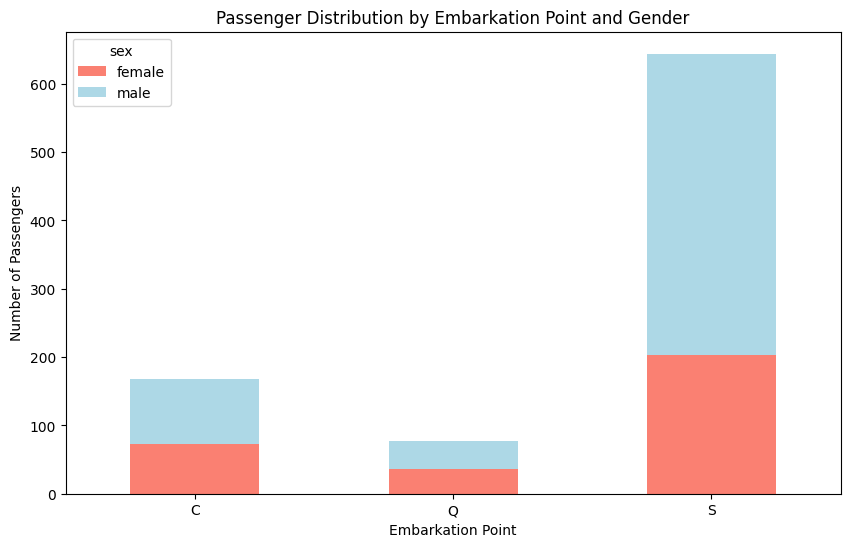

In [ ]:
# Explore the distribution of passenger class by embarkation point
class_by_embarked = titanic_data.groupby(['embarked', 'class']).size().unstack()
print("\nPassenger distribution by Embarkation Point and Class:")
print(class_by_embarked)

# Visualize the distribution of passenger class by embarkation point
class_by_embarked.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Passenger Distribution by Embarkation Point and Class')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

# Explore the distribution of gender by embarkation point
gender_by_embarked = titanic_data.groupby(['embarked', 'sex']).size().unstack()
print("\nPassenger distribution by Embarkation Point and Gender:")
print(gender_by_embarked)

# Visualize the distribution of gender by embarkation point
gender_by_embarked.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title('Passenger Distribution by Embarkation Point and Gender')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

Question 2: Given, from task 3, the survival rates by age group are as follows:

| Age Group | Survival Rate (%) |
|-----------|--------------------|
| Child     | 57.97              |
| Teen      | 38.18              |
| Adult     | 39.74              |
| Middle-Aged| 39.06              |
| Senior    | 22.73              |

Does this indicate that senior passengers were less taken care of?



**Your Q2 discussion here:**
**While Seniors had the lowest survival rate of 22.73%, other factors could have influenced this percentage, not necessarily that they were less taken care of. For example, they had a significantly lower proportion of 1st Class passengers and a higher proportion of 3rd class passengers, which is a likely determinant of their survival rate. There's also less female passengers in this age group, and female passengers had a much higher survival rate. Thus, while seniors had a lower survival rate, there are other factors besides how well they were taken care of that could have contributed to this.


Passenger distribution by Age Group and Class:
class        First  Second  Third
age_group                        
child            4      17     48
teen            17      18     75
adult           89     104    192
middle-aged     62      31     35
senior          14       3      5


/tmp/ipython-input-4232149286.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_by_age_group = titanic_data.groupby(['age_group', 'class']).size().unstack()


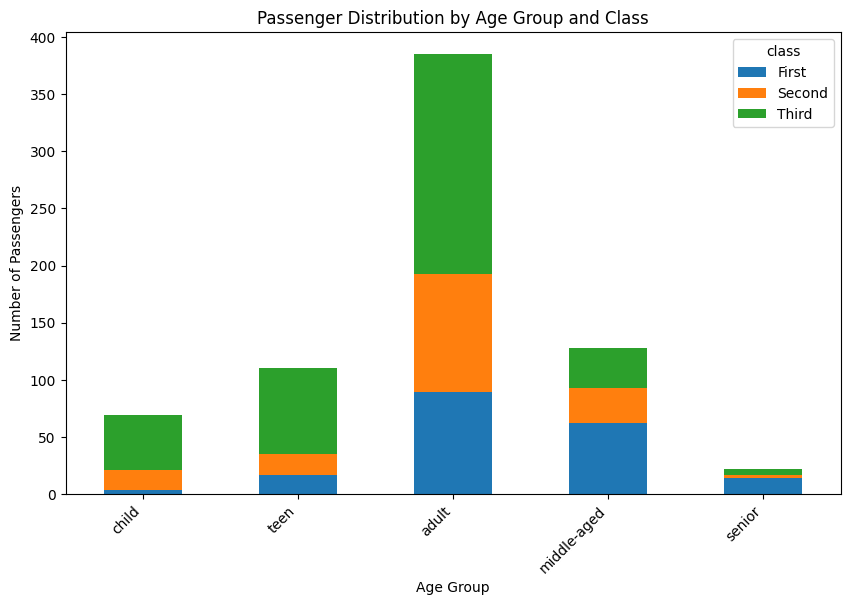

/tmp/ipython-input-4232149286.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_by_age_group = titanic_data.groupby(['age_group', 'sex']).size().unstack()



Passenger distribution by Age Group and Gender:
sex          female  male
age_group                
child            32    37
teen             45    65
adult           136   249
middle-aged      45    83
senior            3    19


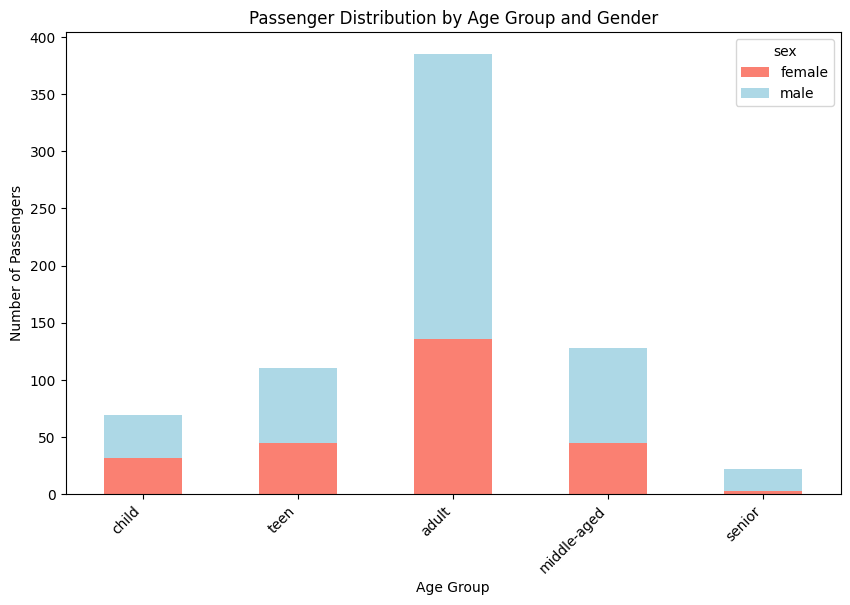

In [ ]:
# Explore the distribution of passenger class by age group
class_by_age_group = titanic_data.groupby(['age_group', 'class']).size().unstack()
print("\nPassenger distribution by Age Group and Class:")
print(class_by_age_group)

# Visualize the distribution of passenger class by age group
class_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Passenger Distribution by Age Group and Class')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45, ha='right')
plt.show()

# Explore the distribution of gender by age group
gender_by_age_group = titanic_data.groupby(['age_group', 'sex']).size().unstack()
print("\nPassenger distribution by Age Group and Gender:")
print(gender_by_age_group)

# Visualize the distribution of gender by age group
gender_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title('Passenger Distribution by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45, ha='right')
plt.show()

When you are done, make sure to submit your assignments in accordance with the instructions on canvas.